In [3]:
import pandas as pd
import os
import numpy as np
import sys
import pypairix

import cooler
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt
import seaborn as sns

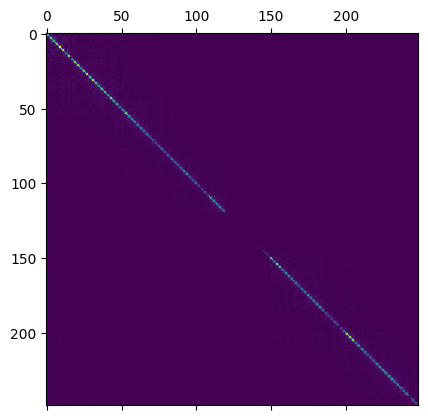

In [31]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/2018_hic/cooler/T10.mcool::/resolutions/1000000"

clr = cooler.Cooler(fpath)

plt.matshow(clr.matrix(balance=False).fetch('1'))


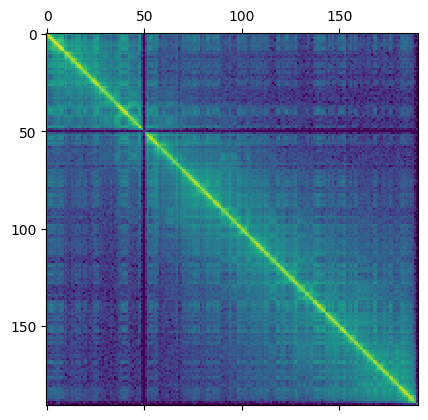

In [35]:
t = clr.matrix(balance=False).fetch('4')
t = np.log1p(t)

plt.matshow(t)

0.00988895456771119

In [31]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/2018_hic/pairs/T10.pairs.stats"

res = []
for line in open(fpath):
    if line.startswith('dist_freq'):

        line_str = line.replace('dist_freq/', '')
        meta, count = line_str.split("\t")

        count = int(count)
        contact_type = meta.split("/")[1]

        dist = meta.split("/")[0].split("-")
        if not len(dist) == 2:
            continue
        else:
            dist = list(map(int, dist))

        row = {
            'dist' : np.mean(dist),
            'dist_lb' : dist[0],
            'dist_ub' : dist[1],
            'count' : count,
            'contact_type' : contact_type,
        }
        res.append(row)

df = pd.DataFrame(res)
df.head()

,dist,dist_lb,dist_ub,count,contact_type
0,0.5,0,1,54,+-
1,0.5,0,1,69,-+
2,0.5,0,1,10318,--
3,0.5,0,1,10161,++
4,1.5,1,2,30,+-


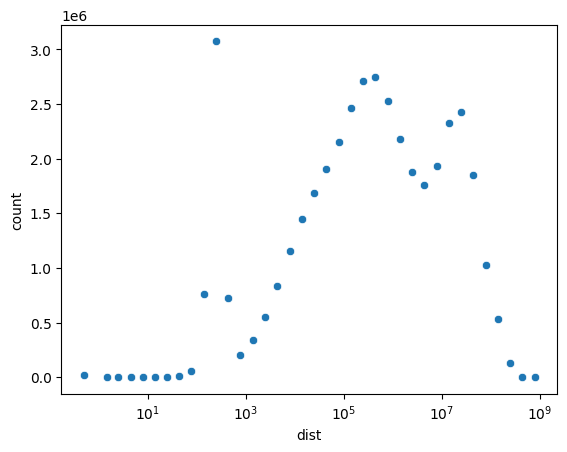

In [36]:
gx = df.groupby('dist')['count'].sum().reset_index(drop=False)

sns.scatterplot(data=gx, 
                x='dist',
                y='count')

plt.xscale('log')